In [ ]:
!pip install mysql-connector-python

In [ ]:
import mysql.connector

connection = mysql.connector.connect(
    host="127.0.0.1",
    user="root",
    password="     ",
    database="preday49")
cursor = connection.cursor()

In [ ]:
import pandas as pd

In [ ]:
cursor.execute("""
CREATE TABLE IF NOT EXISTS customers(
    id INT PRIMARY KEY,
    name VARCHAR(100),
    city VARCHAR(100)
) ENGINE=InnoDB;
""")

cursor.execute("""
INSERT INTO customers VALUES
    (1, 'Alice', 'Hanoi'),
    (2, 'Bob', 'Ho Chi Minh'),
    (3, 'Charlie', 'Hanoi')
;
""")
connection.commit()

cursor.execute("""
CREATE TABLE IF NOT EXISTS orders(
    id INT PRIMARY KEY,
    customer_id INT,
    order_date DATE,
    total INT
)ENGINE=InnoDB;
""")

cursor.execute("""
INSERT INTO orders VALUES
    (1, 1, '2024-01-10', 500),
    (2, 1, '2024-03-01', 800),
    (3, 2, '2024-02-20', 1200),
    (4, 3, '2024-01-15', 200)
;
""")
connection.commit()

cursor.execute("""
CREATE TABLE IF NOT EXISTS products(
    id INT PRIMARY KEY,
    name VARCHAR(100),
    price INT
)ENGINE=InnoDB;
""")

cursor.execute("""
INSERT INTO products VALUES
    (1, 'Laptop', 1500),
    (2, 'Mouse', 50),
    (3, 'Keyboard', 100),
    (4, 'Monitor', 300)
;
""")
connection.commit()

cursor.execute("""
CREATE TABLE IF NOT EXISTS order_items(
    id INT PRIMARY KEY,
    order_id INT,
    product_id INT,
    quantity INT
)ENGINE=InnoDB;
""")

cursor.execute("""
INSERT INTO order_items VALUES
    (1, 1, 2, 2),
    (2, 1, 3, 1),
    (3, 2, 1, 1),
    (4, 2, 4, 1),
    (5, 3, 1, 1)
;
""")
connection.commit()

cursor.execute("""
CREATE TABLE IF NOT EXISTS employees(
    id INT PRIMARY KEY,
    name VARCHAR(100),
    department VARCHAR(100)
)ENGINE=InnoDB;
""")

cursor.execute("""
INSERT INTO employees VALUES
    (1, 'David', 'Sales'),
    (2, 'Emma', 'Support'),
    (3, 'Frank', 'Sales')
;
""")
connection.commit()

cursor.execute("""
CREATE TABLE IF NOT EXISTS order_assignments(
    id INT PRIMARY KEY,
    order_id INT,
    employee_id INT
)ENGINE=InnoDB;
""")

cursor.execute("""
INSERT INTO order_assignments VALUES
    (1, 1, 1),
    (2, 2, 3),
    (3, 3, 2)
;
""")
connection.commit()

In [ ]:
# Tạo procedure lấy tổng số đơn hàng của 1 khách hàng
# Đầu vào: customer_id (INT)
# Đầu ra: order_count (INT)

query = """
        CREATE PROCEDURE IF NOT EXISTS getordercount(
            IN p_customer_id INT,
            OUT p_order_count INT
        )
        BEGIN
            SELECT COUNT(*) INTO p_order_count
            FROM orders
            WHERE customer_id = p_customer_id;
        END;
"""
cursor.execute(query)
connection.commit()

# Gọi procedure
customer_id = 1
cursor.execute("SET @order_count = 0")
query = "CALL getordercount (%s, @order_count)"
cursor.execute(query, (customer_id,))

# Lấy kết quả
query = "SELECT @order_count"
cursor.execute(query)
result = cursor.fetchone()

# Hiển thị kết quả
order_count = result[0]
print(f"Tổng số đơn hàng của khách hàng {customer_id}: {order_count}")

# image.png

In [ ]:
# Tạo procedure lấy tên nhân viên theo mã ID
# Đầu vào: employee_id (INT)
# Đầu ra: employee_name (VARCHAR)

query="""
CREATE PROCEDURE IF NOT EXISTS getemployeename(
    IN p_employee_id INT,
    OUT p_employee_name VARCHAR(50)
)
BEGIN
    SELECT name INTO p_employee_name
    FROM employees
    WHERE id= p_employee_id;
END
;"""

cursor.execute(query)
connection.commit()

employee_id = 1
cursor.execute("SET @employee_name = '\n' ") # gán giá trị ban đầu
cursor.execute("CALL getemployeename (%s, @employee_name)", (employee_id,))   #gọi procedure
cursor.execute("SELECT @employee_name") #lấy kết quả
ename= cursor.fetchone() [0]  # hiển thị kết quả
print(f"Tên nhân viên có mã {employee_id}: {ename}")

#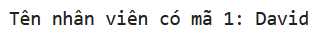

In [ ]:
# Tạo procedure cập nhật thành phố của khách hàng
# Đầu vào: customer_id (INT), new_city (VARCHAR)

query="""
CREATE PROCEDURE IF NOT EXISTS updatecity(
    IN p_customer_id INT,
    IN p_new_city VARCHAR(50)
)
BEGIN
    UPDATE customers
    SET city = p_new_city
    WHERE id = p_customer_id;
END
;"""

cursor.execute(query)
connection.commit()

p_customer_id = 1
p_new_city = "Ho Chi Minh"
cursor.execute("CALL updatecity(%s, %s)", (p_customer_id, p_new_city))
connection.commit()

query= "SELECT name, city FROM customers WHERE id = 1"
data=pd.read_sql_query(query, connection)
data


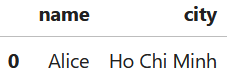

In [ ]:
# Tạo procedure in ra các sản phẩm có giá từ X trở lên
# Đầu vào: min_price (INT)

query="""
CREATE PROCEDURE IF NOT EXISTS listproducts(
    IN min_price INT)
BEGIN
    SELECT name
    FROM products
    WHERE price > min_price
;END
;"""

cursor.execute(query)
connection.commit()

min_price = 100
cursor.execute("CALL listproducts(%s)", (min_price,))
results= cursor.fetchall()

for product in results:
    print(product[0])

In [ ]:
# Tạo procedure xoá đơn hàng có tổng < X
# Đầu vào: min_total (INT)

query="""
CREATE PROCEDURE deleteorder(
    IN min_total INT
)
BEGIN
    DELETE FROM orders
    WHERE total < min_total;
END
;"""
cursor.execute(query)
connection.commit()

min_total= 50
cursor.execute("CALL deleteorder(%s)", (min_total,))
query=" SELECT * FROM orders"
data=pd.read_sql_query(query, connection)
data